In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from IPython.display import display

%matplotlib inline

def print_full_rows(x):
    pd.set_option('display.max_rows', len(x))
    display(x)
    pd.reset_option('display.max_rows')
def print_full_cols(x):
    pd.set_option('max_colwidth', 100)
    display(x)
    pd.reset_option('display.max_colwidth')

In [34]:
df = pd.read_csv("trucks_downtime.csv", encoding='latin-1')
df.drop(['Sistema', 'Comentario'], axis=1, inplace=True) # drop some spanish

df.rename(
    columns={
        'Estado/C¢digo': 'state_code',
        'Commentary_google_translated': 'commentary',
        'C¢digo de tipo': 'type',
        'System_google_translated': 'system'
    },
    inplace=True)
rename_dict = dict()


def format_title(title):
    return ''.join(
        map(lambda x: x if (x.isupper() or x.islower()) else '_',
            title.strip()))


for c in df.columns:
    temp = format_title(c.lower())
    rename_dict[c] = temp
df.rename(columns=rename_dict, inplace=True)
df.rename(
    columns={
        'duration__min_': 'duration_min',
        'duration__hrs_': 'duration_hrs',
        'equipo': 'equip',
        'locaton': 'location'
    },
    inplace=True)
df.drop(['type'], axis=1, inplace=True) # 1 value
for c in ['start_time', 'end_time']:
    df[c] = pd.to_datetime(df[c])

df.replace({'work_type' : {'No programado' : 'unscheduled', 'Programado': 'scheduled'}}, inplace=True)


In [71]:
df.sample(3)

,equip,start_time,week,system,state_code,end_time,duration_min,duration_hrs,work_type,commentary,location
4,TK434,2016-01-02 10:19:00,Week-01,SERVICES,4,2016-01-03 01:23:00,904.02,15.1,scheduled,PM 4000 HRS + RIGHT SIDE ACCESS STAIR REPAIR,2
652,TK408,2016-07-18 00:41:00,Week-029,IMPLEMENTS,5,2016-07-18 02:45:00,123.87,2.1,scheduled,INSTALLATION OF LETTER AND SIGNS,103
379,TK408,2016-04-23 23:20:00,Week-017,"RUBBER, RIMS AND TIRES",24,2016-04-24 11:15:00,715.17,11.9,unscheduled,LIFT POSITION 5 REVENT?,16


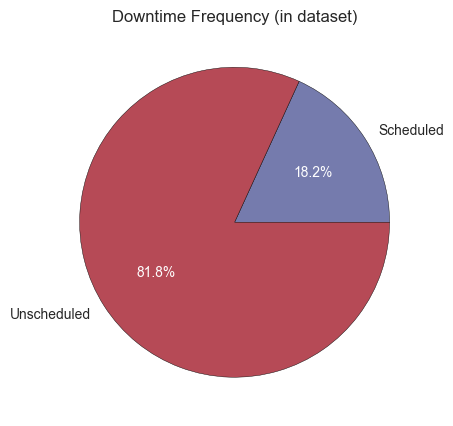

In [36]:
plt.figure(figsize=(5,5))
plt.title("Downtime Frequency (in dataset)")
counts = df.groupby(['work_type']).size()
_, _, autotexts= plt.pie(counts, autopct='%1.1f%%', colors=['#757bad','#b64a56'], labels=["Scheduled", "Unscheduled"])
for autotext in autotexts:
    autotext.set_color('white')

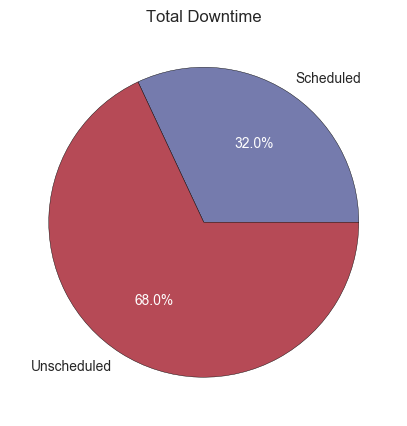

In [37]:
plt.figure(figsize=(5,5))
plt.title("Total Downtime")
sums = df.groupby(['work_type'])['duration_min'].sum()
_, _, autotexts= plt.pie(sums, autopct='%1.1f%%', colors=['#757bad','#b64a56'], labels=["Scheduled", "Unscheduled"])
for autotext in autotexts:
    autotext.set_color('white')

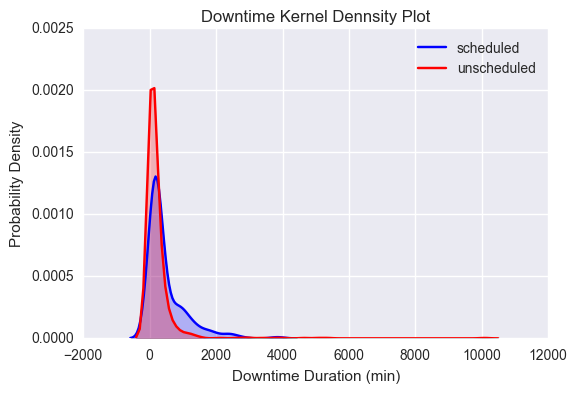

In [73]:
a = df[df['work_type'] == 'scheduled']['duration_min']
b = df[df['work_type'] == 'unscheduled']['duration_min']
ax = sns.kdeplot(a, shade=True, color="b", legend=False, label='scheduled')
ax = sns.kdeplot(b, shade=True, color="r", legend=True, label='unscheduled')
plt.xlabel("Downtime Duration (min)")
plt.ylabel("Probability Density")
plt.title("Downtime Kernel Dennsity Plot")

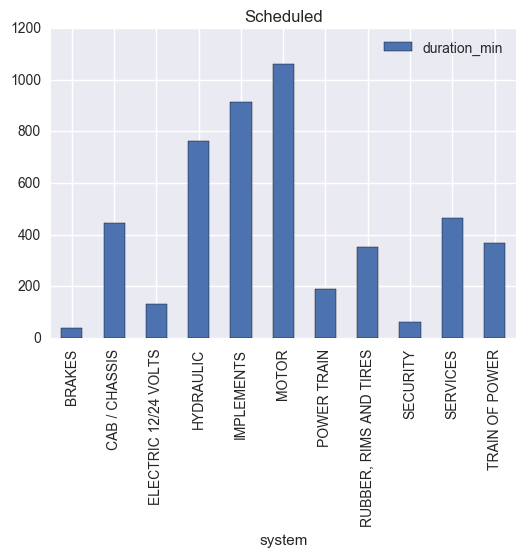

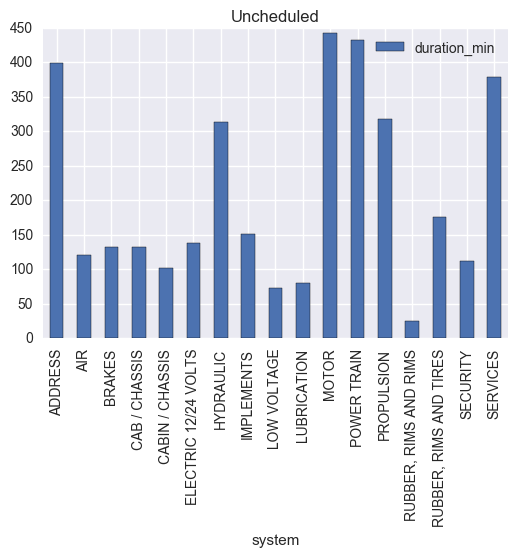

In [65]:
temp = df.groupby(['system', 'work_type'])['duration_min'].mean().reset_index()

ax = temp[temp['work_type'] == 'scheduled'].reset_index()[['system', 'duration_min']].set_index('system').plot(kind='bar')
plt.title("Scheduled (mean)")
ax = temp[temp['work_type'] == 'unscheduled'].reset_index()[['system', 'duration_min']].set_index('system').plot(kind='bar')
plt.title("Unscheduled (mean)")

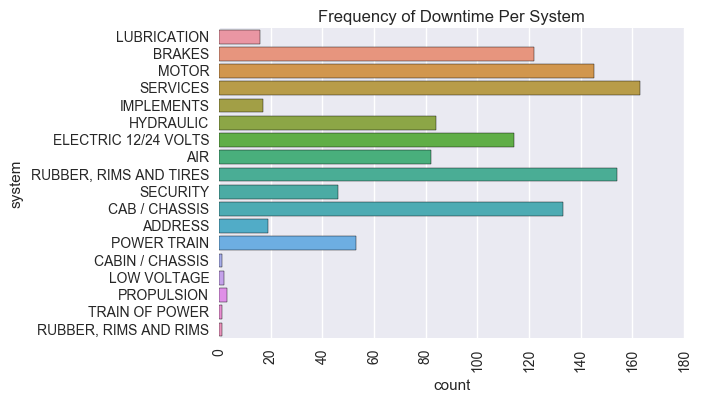

In [68]:
plt.xticks(rotation=90)
plt.title("Frequency of Downtime Per System")
sns.countplot(y='system', data=df)